Copyright **`(c)`** 2021 Giovanni Squillero `<squillero@polito.it>`  
`https://github.com/squillero/computational-intelligence`  
Free for personal or classroom use; see 'LICENCE.md' for details.

In [152]:
import logging
import numpy as np
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt

logging.basicConfig(format='[%(asctime)s] %(levelname)s: %(message)s', datefmt='%H:%M:%S', level=logging.INFO)

In [153]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [154]:
NUM_ITEMS = 100
DIMENSIONS = 50

WEIGHTS = np.random.randint(1, 50+1, size=(NUM_ITEMS, DIMENSIONS))
MAX_WEIGHTS = np.full(DIMENSIONS, NUM_ITEMS*20)
VALUES = np.random.randint(1, 100+1, size=NUM_ITEMS)

In [155]:
def create_evaluator(values):
    def evaluate(knapsack):
        if all(np.sum(WEIGHTS[knapsack], axis=0) < MAX_WEIGHTS):
            return np.sum(values[knapsack])
        else:
            return -1
    return evaluate

In [170]:
def tweak(_solution):
    _new_solution = _solution.copy()
    index = None
    while index is None or np.random.random() < .5:
        index = np.random.randint(0, NUM_ITEMS)
        _new_solution[index] = not _new_solution[index]
    return _new_solution

In [182]:
NUM_RESTARTS = 10
#CONVERGENCE_THRESHOLD = -1  # negative number means "never interrupt", always perform 10K evlauations
CONVERGENCE_THRESHOLD = 1e-6 # another possible value, achieves good solution with less than 5K evaluations

evaluators = [create_evaluator(np.random.randint(1, 100+1, size=NUM_ITEMS)) for f in range(0,NUM_RESTARTS)]
best_solution = []
histories = []

max_value = -1
evaluations = 0

for i in range(0, NUM_RESTARTS):
    solution = np.full(NUM_ITEMS, False) # restarts the solution
    history = [evaluators[i](solution)]

    # initialization stubs
    last_improvement = 1
    new_solution = solution
    new_value = -1

    for n in tqdm(range(1, 1000+1)):
        new_solution = tweak(solution)
        new_value = evaluators[i](new_solution)
        evaluations += 1
        history.append(new_value)
        if new_value > 0 and abs(new_value - evaluators[i](solution)) < CONVERGENCE_THRESHOLD:
            break
        if new_value > evaluators[i](solution):
            #logging.info(f"Whoa! After {n:,} found value={value(new_solution):,}")
            last_improvement = n
            solution = new_solution

    if new_value > max_value:
        max_value = new_value
        best_solution = new_solution

    print(f"Finl value: {evaluators[i](solution):,} -- last improvement: {last_improvement:,}")
    histories.append(history)

print(f"\nBest solution: {max_value} -- total evaluations: {evaluations}")


  0%|          | 0/1000 [00:00<?, ?it/s]

Finl value: 4,328 -- last improvement: 399


  0%|          | 0/1000 [00:00<?, ?it/s]

Finl value: 3,916 -- last improvement: 233


  0%|          | 0/1000 [00:00<?, ?it/s]

Finl value: 3,528 -- last improvement: 399


  0%|          | 0/1000 [00:00<?, ?it/s]

Finl value: 3,881 -- last improvement: 296


  0%|          | 0/1000 [00:00<?, ?it/s]

Finl value: 3,957 -- last improvement: 180


  0%|          | 0/1000 [00:00<?, ?it/s]

Finl value: 3,511 -- last improvement: 93


  0%|          | 0/1000 [00:00<?, ?it/s]

Finl value: 1,279 -- last improvement: 16


  0%|          | 0/1000 [00:00<?, ?it/s]

Finl value: 3,679 -- last improvement: 116


  0%|          | 0/1000 [00:00<?, ?it/s]

Finl value: 4,321 -- last improvement: 784


  0%|          | 0/1000 [00:00<?, ?it/s]

Finl value: 3,404 -- last improvement: 68

Best solution: 4328 -- total evaluations: 2817


  0%|          | 0/10 [00:00<?, ?it/s]

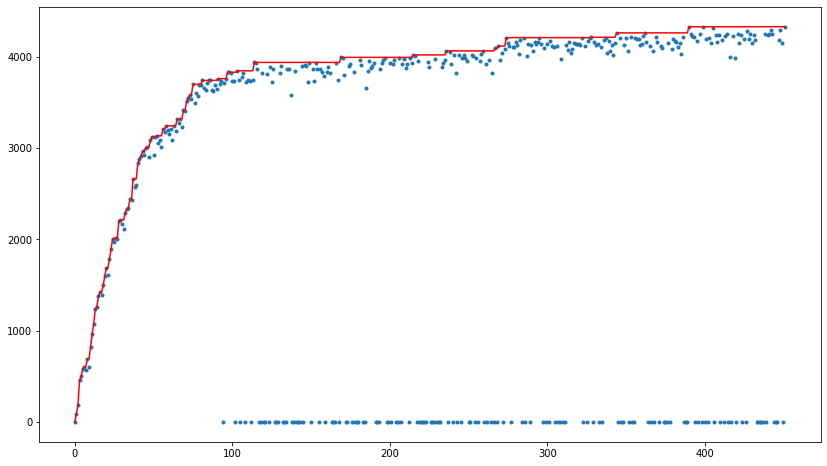

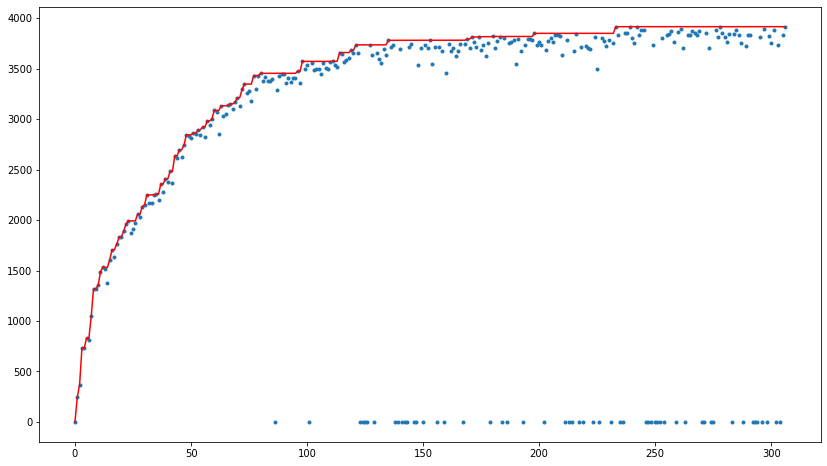

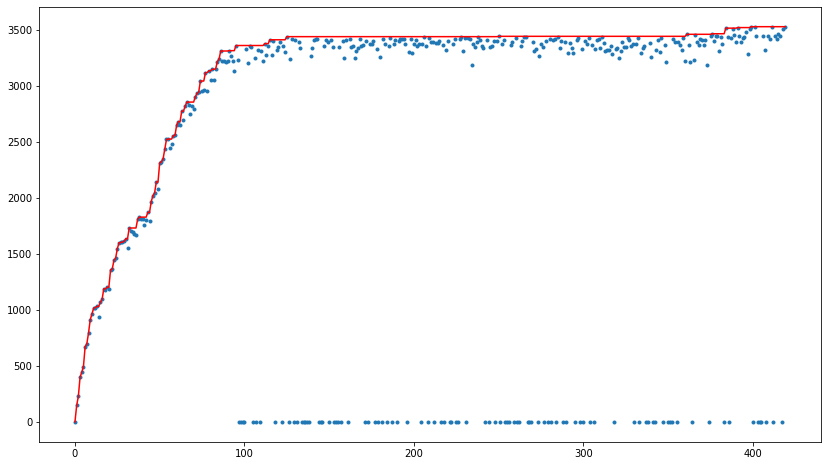

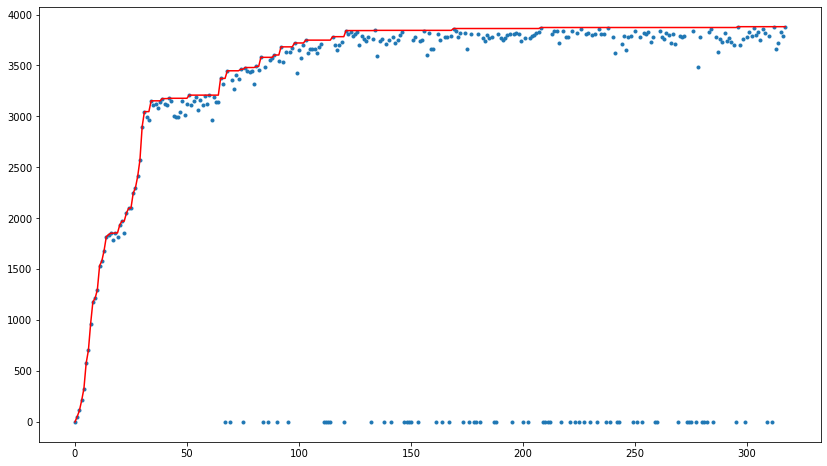

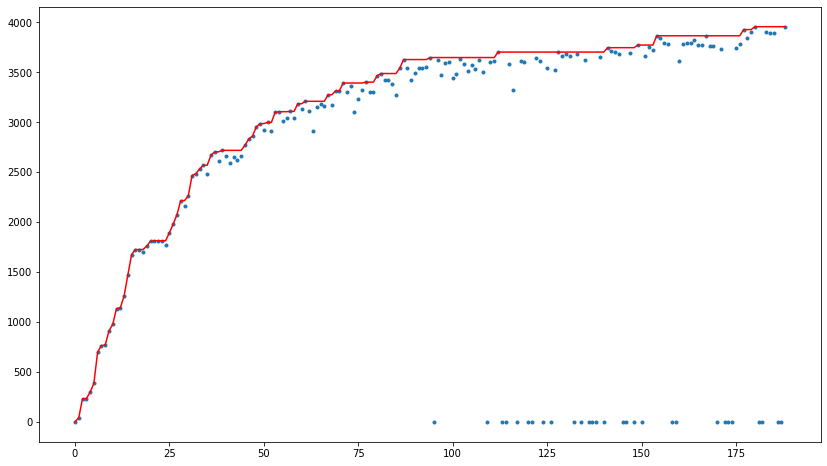

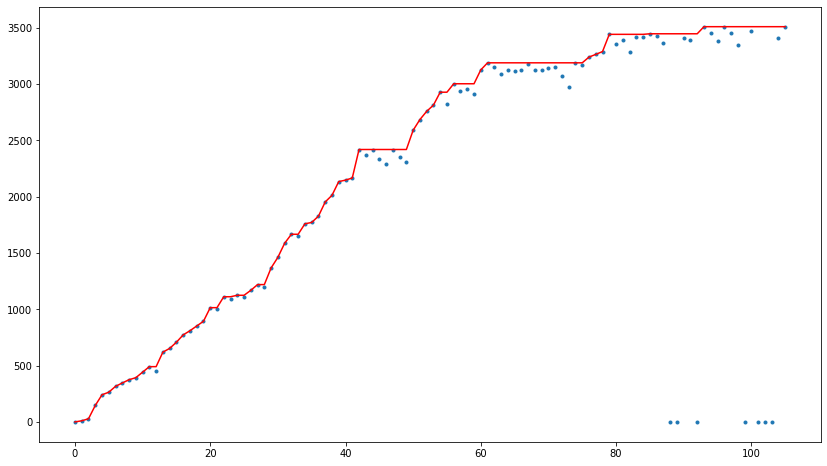

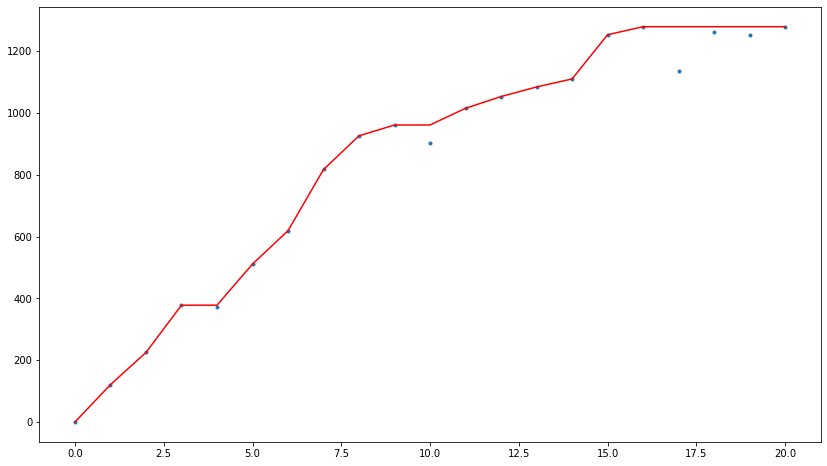

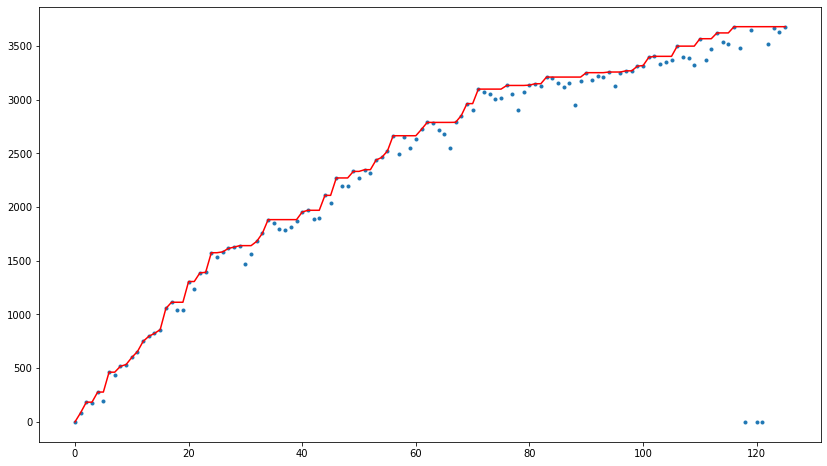

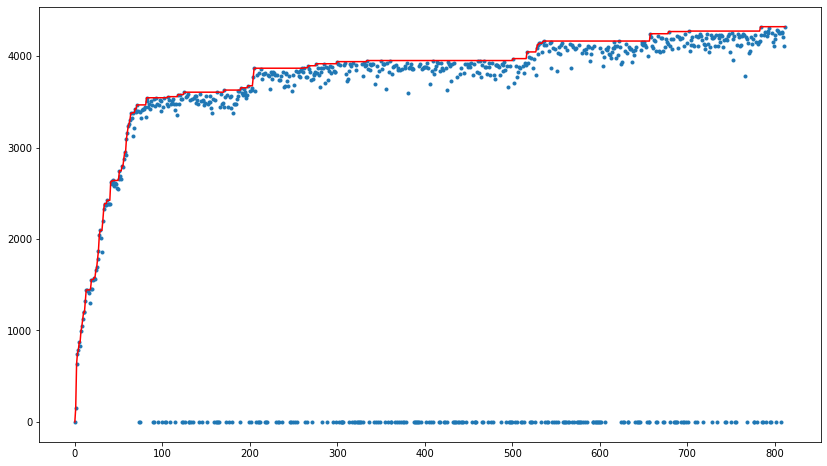

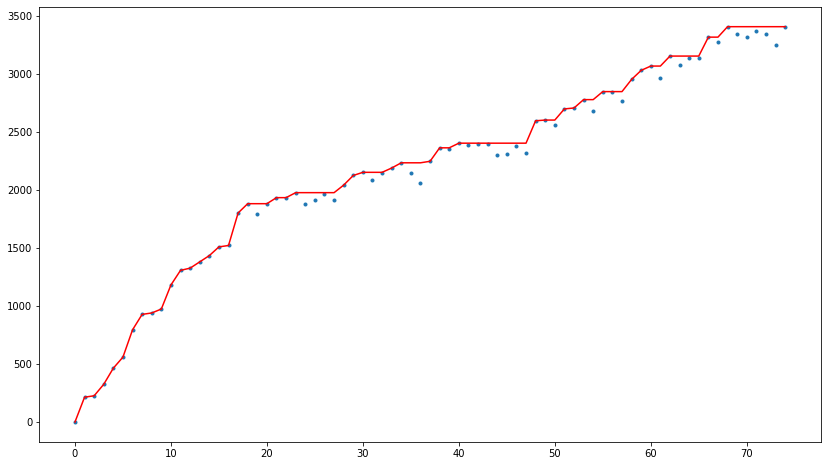

In [183]:
for k in tqdm(range(0, NUM_RESTARTS)):
    plt.figure(figsize=(14, 8))
    plt.plot(range(len(histories[k])), [max(histories[k][:i+1]) for i in range(len(histories[k]))], color='red')
    plt.scatter(range(len(histories[k])), histories[k], marker='.')